# Požáry Brazilských lesů

In [1]:
# Nahrání potřebných knihoven.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Načtení dat.
fires = pd.read_csv('amazon.csv', encoding='latin1', names=['rok', 'stát', 'měsíc', 'počet', 'datum'], skiprows=1)


In [3]:
# Přeložení názvů měsíců do češtiny.
month_map={'Janeiro': 'Leden', 'Fevereiro': 'Únor', 'Março': 'Březen', 'Abril': 'Duben', 'Maio': 'Květen',
          'Junho': 'Červen', 'Julho': 'Červenec', 'Agosto': 'Srpen', 'Setembro': 'Září', 'Outubro': 'Říjen',
          'Novembro': 'Listopad', 'Dezembro': 'Prosinec'}

# Namapování překladu měsíců
fires['měsíc']=fires['měsíc'].map(month_map)

In [4]:
# Výpis prvních 10 řádků dat
print(fires.head(10))

# Unikátní názvy
print('Unikátní názvy států:', fires.stát.unique())
print('Unikátní názvy měsíců:', fires.měsíc.unique())


# Počet požárů celkem
N_fires = fires.počet.sum()

    rok  stát  měsíc  počet       datum
0  1998  Acre  Leden    0.0  1998-01-01
1  1999  Acre  Leden    0.0  1999-01-01
2  2000  Acre  Leden    0.0  2000-01-01
3  2001  Acre  Leden    0.0  2001-01-01
4  2002  Acre  Leden    0.0  2002-01-01
5  2003  Acre  Leden   10.0  2003-01-01
6  2004  Acre  Leden    0.0  2004-01-01
7  2005  Acre  Leden   12.0  2005-01-01
8  2006  Acre  Leden    4.0  2006-01-01
9  2007  Acre  Leden    0.0  2007-01-01
Unikátní názvy států: ['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'Pará'
 'Paraiba' 'Pernambuco' 'Piau' 'Rio' 'Rondonia' 'Roraima' 'Santa Catarina'
 'Sao Paulo' 'Sergipe' 'Tocantins']
Unikátní názvy měsíců: ['Leden' 'Únor' 'Březen' 'Duben' 'Květen' 'Červen' 'Červenec' 'Srpen'
 'Září' 'Říjen' 'Listopad' 'Prosinec']


V datech vidíme ...

## Počet požárů podle států

In [5]:
# Rozdělení počtu požárů podle států za 20 let  
sub_fires_per_stat=[]
staty=list(fires.stát.unique())

for j in staty:
    y2=fires.loc[fires['stát']==j].počet.sum().round(0)
    sub_fires_per_stat.append(y2)  
    
#creating a dictionary with results     
fire_stat_dic={'Stát':staty,'Počet požárů':sub_fires_per_stat}
#creating a new sub dataframe for later plot 
stat_plot_1_df = pd.DataFrame(fire_stat_dic)

stat_plot_sorted_df = stat_plot_1_df.sort_values(by=['Počet požárů'], ascending=False)

stat_plot_sorted_df_10 = (stat_plot_sorted_df.reset_index()).nlargest(11, 'Počet požárů') 
stat_plot_sorted_df_10 = stat_plot_sorted_df_10.reset_index()


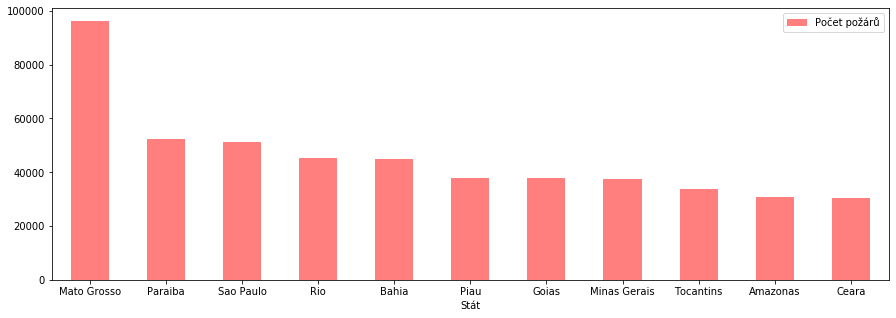

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


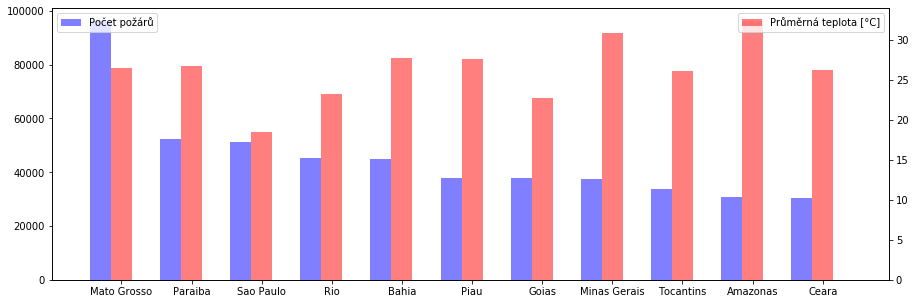

In [6]:
# Bar plot
plt.rcParams["figure.figsize"] = [15, 5]
stat_plot_sorted_df_10.plot.bar(x='Stát', y='Počet požárů', rot=0, alpha=0.5,  color='red') #tuple(["g", "b","r","y","k"''])
plt.show()

# Závislost počtu požárů ve státech na teplotě / srážkách
a = stat_plot_sorted_df_10['level_0'] #nové indexování pro seřezení od největšího po nejmenší
b = stat_plot_sorted_df_10['Počet požárů'] 

# Průměrné teploty v 11 státech s nejvíce požáry [°C]
t = (26.5, 26.7, 18.5, 23.2, 27.8, 27.6,  22.8, 30.9, 26.1, 32.4, 26.3)
# Srážky v 11 státech s nejvíce požáry [mm]
r = (768, 862, 1340, 1278, 846, 1349, 1417, 1081, 1500, 1004, 1448)



# Závislost počtu požárů na teplotě
ax1 = plt.subplot(111)
ax2 = plt.subplot(111)
w = 0.3
ax1.bar(a-w, b, width=w, color='b', align='center', alpha=0.5, label='Počet požárů')
ax2 = ax1.twinx()
ax2.bar(a, t, width=w, color='r', align='center', alpha=0.5, label='Průměrná teplota [°C]')


# Nastavení názvů států
height = np.zeros(len(a))
bars = tuple(stat_plot_sorted_df_10['Stát'].values.tolist())
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(y_pos, bars, color='black', rotation=0, fontweight='normal', fontsize='10', horizontalalignment='center')

ax1.legend(loc=2)
ax2.legend(loc=1)

plt.show()


## Počet požárů v jednotlivých měsících

       Měsíc  Počet požárů
0      Leden       47748.0
1       Únor       30848.0
2     Březen       30717.0
3      Duben       28189.0
4     Květen       34731.0
5     Červen       56011.0
6   Červenec       92326.0
7      Srpen       88050.0
8       Září       58578.0
9      Říjen       88682.0
10  Listopad       85508.0
11  Prosinec       57535.0


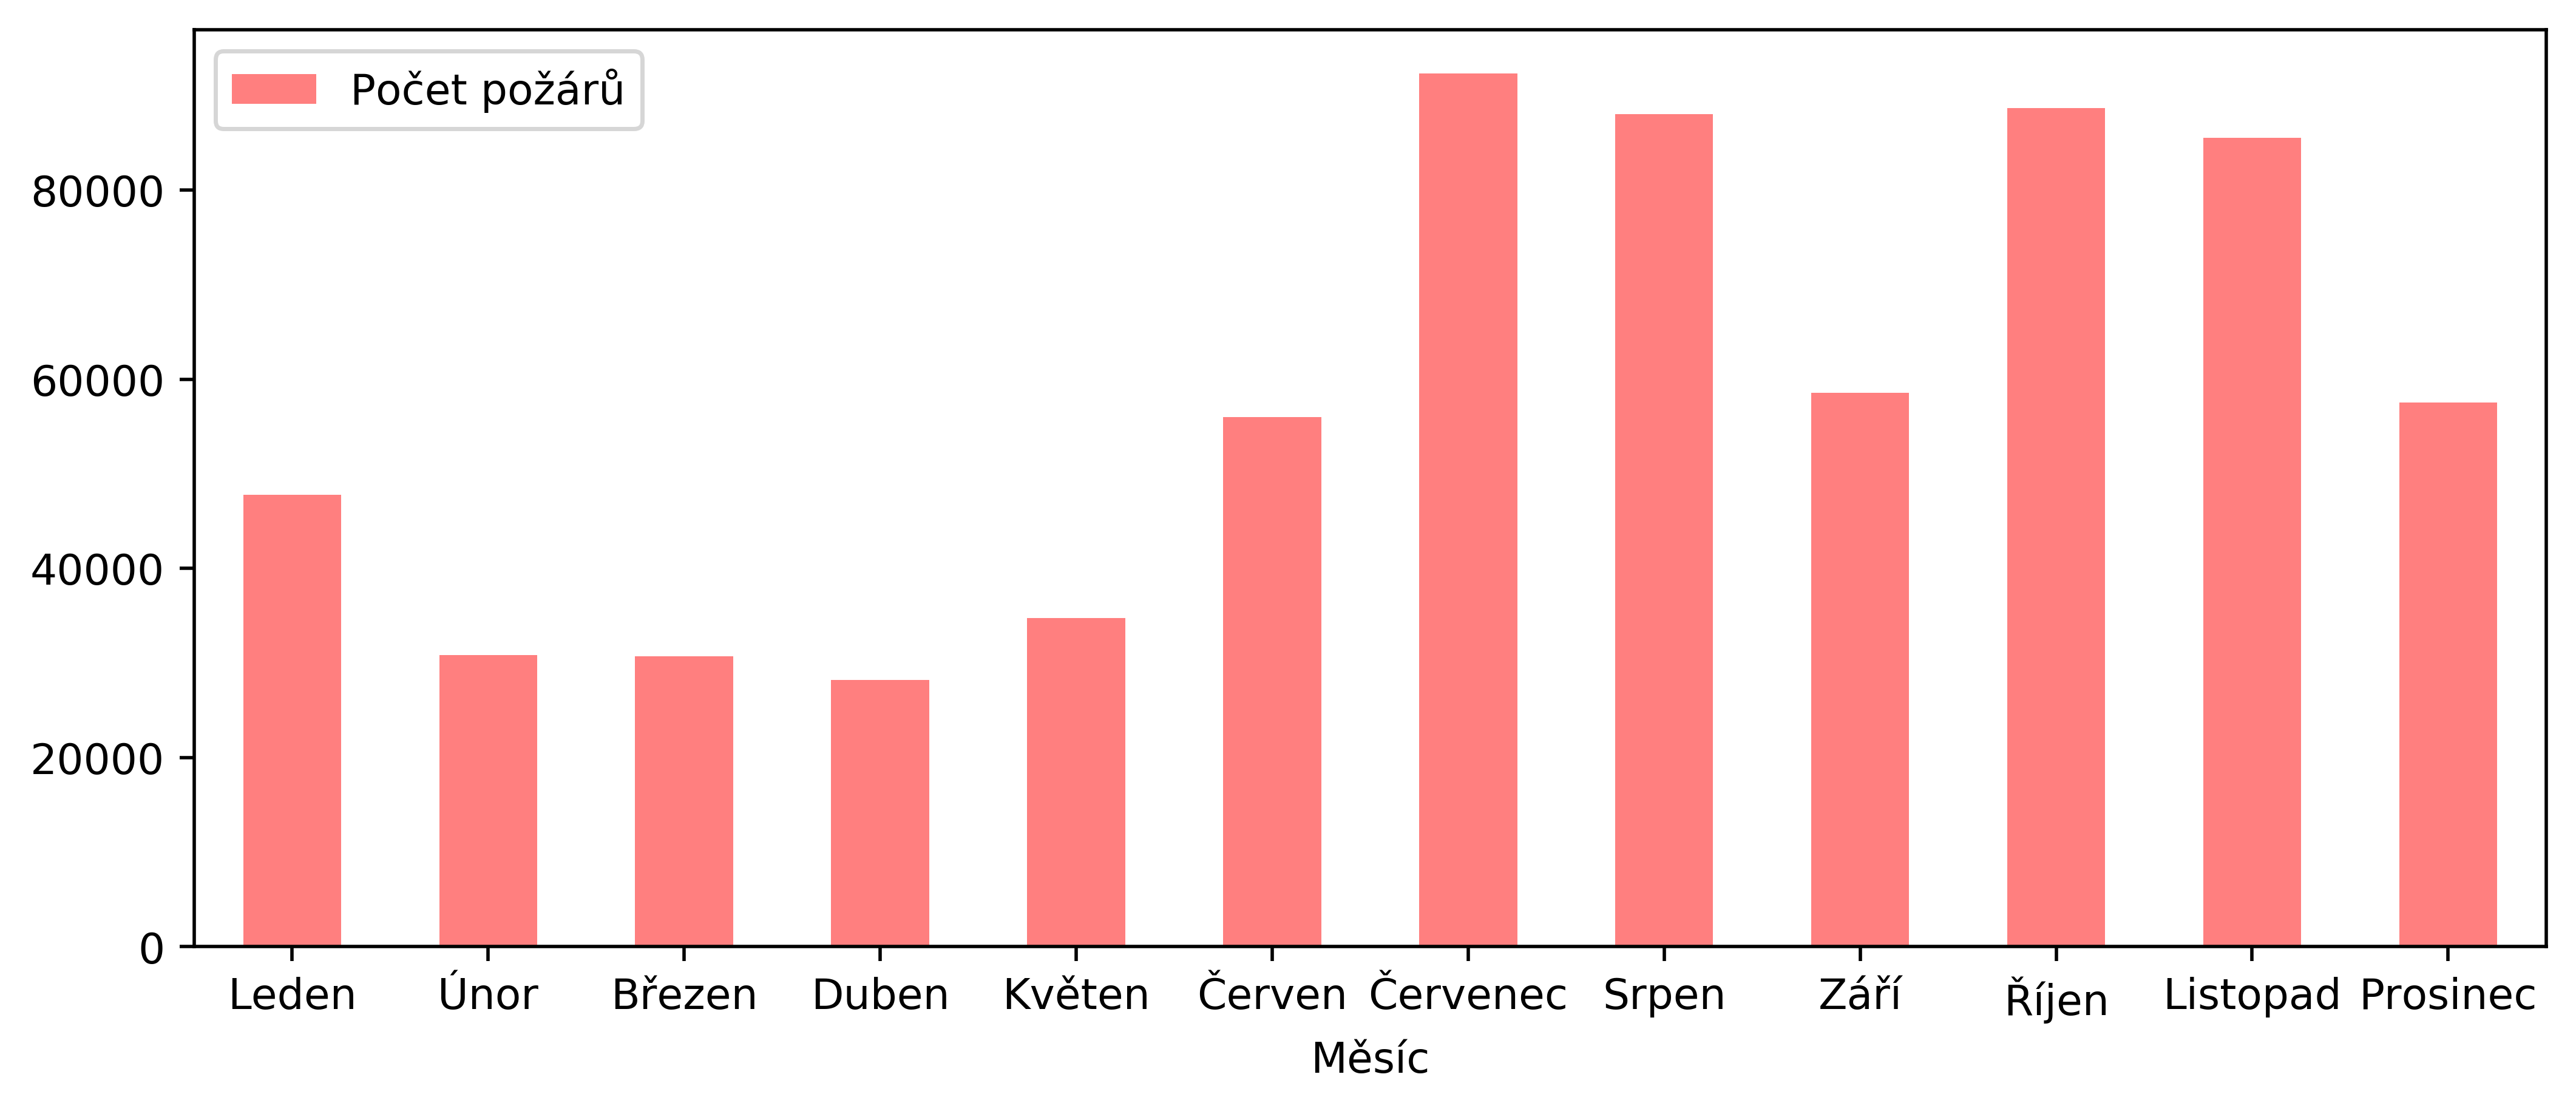

In [7]:
# Rozdělení počtu požárů podle států za 20 let  
pozary_za_mesic=[]
mesice = list(fires.měsíc.unique())

for k in mesice:
    y3=fires.loc[fires['měsíc']==k].počet.sum().round(0)
    pozary_za_mesic.append(y3)  
    
# Vytvoření df s výsledky  
pozary_mesic={'Měsíc':mesice,'Počet požárů':pozary_za_mesic}
# Vytvoření nového sub df pro graf
mesic_plot_df = pd.DataFrame(pozary_mesic)
print(mesic_plot_df)

#Graf
plt.rcParams["figure.figsize"] = [10, 4]
plt.rcParams["figure.dpi"] = 500
mesic_plot_df.plot.bar(x='Měsíc', y='Počet požárů', rot=0, alpha=0.5,  color='r')
plt.show()

## Vývoj počtu požárů za roků

[1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


Text(0.5, 1.0, 'Vývoj počtu požárů podle 20 let')

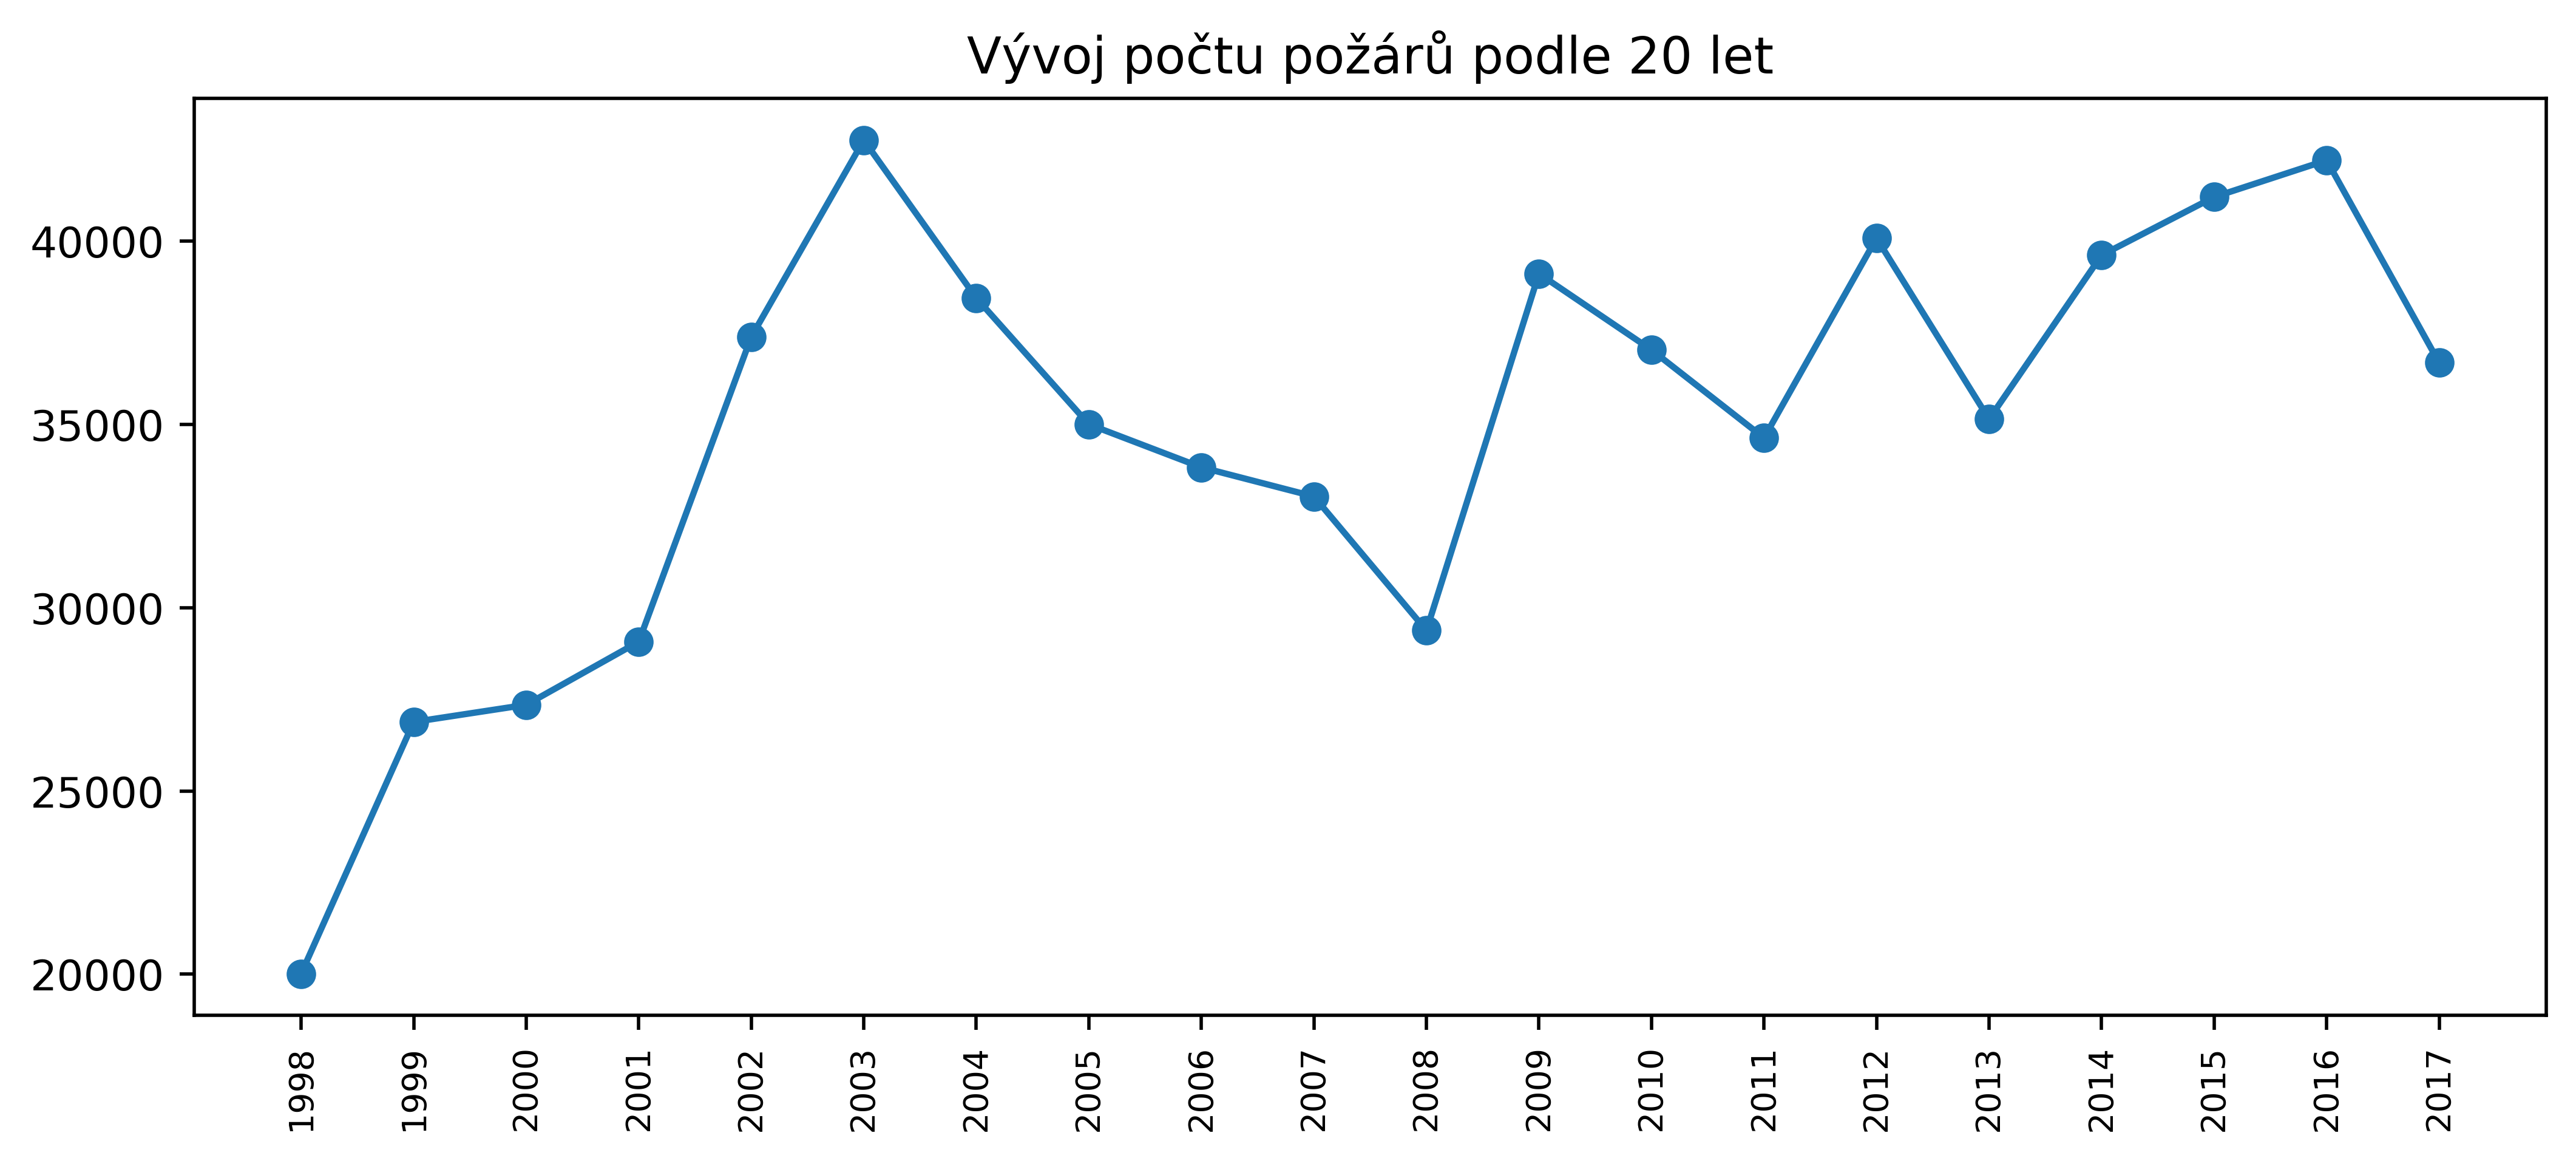

In [8]:
# Rozdělení počtu požárů podle roků
pozary=[]
roky = list(fires.rok.unique())
print(roky)

for i in roky:
    y4=fires.loc[fires['rok']==i].počet.sum().round(0)
    pozary.append(y4)  
    
# Vytvoření df s výsledky  
pozary={'Rok':roky,'Počet požárů':pozary}
# Vytvoření nového sub df pro graf
pozary_plot_df = pd.DataFrame(pozary)

ax1 = plt.subplot(111)
ax2 = plt.subplot(111)
a = pozary_plot_df['Rok']
b = pozary_plot_df['Počet požárů']
ax1.scatter(a, b)
ax2.plot(a, b)
plt.xticks(a, color='black', rotation=90, fontweight='normal', fontsize='8', horizontalalignment='center')
plt.title('Vývoj počtu požárů podle 20 let')


### Extrapolace vývoje pro další roky


[array(36686.), array(31160.), array(36606.86930614), array(63999.47722457)]


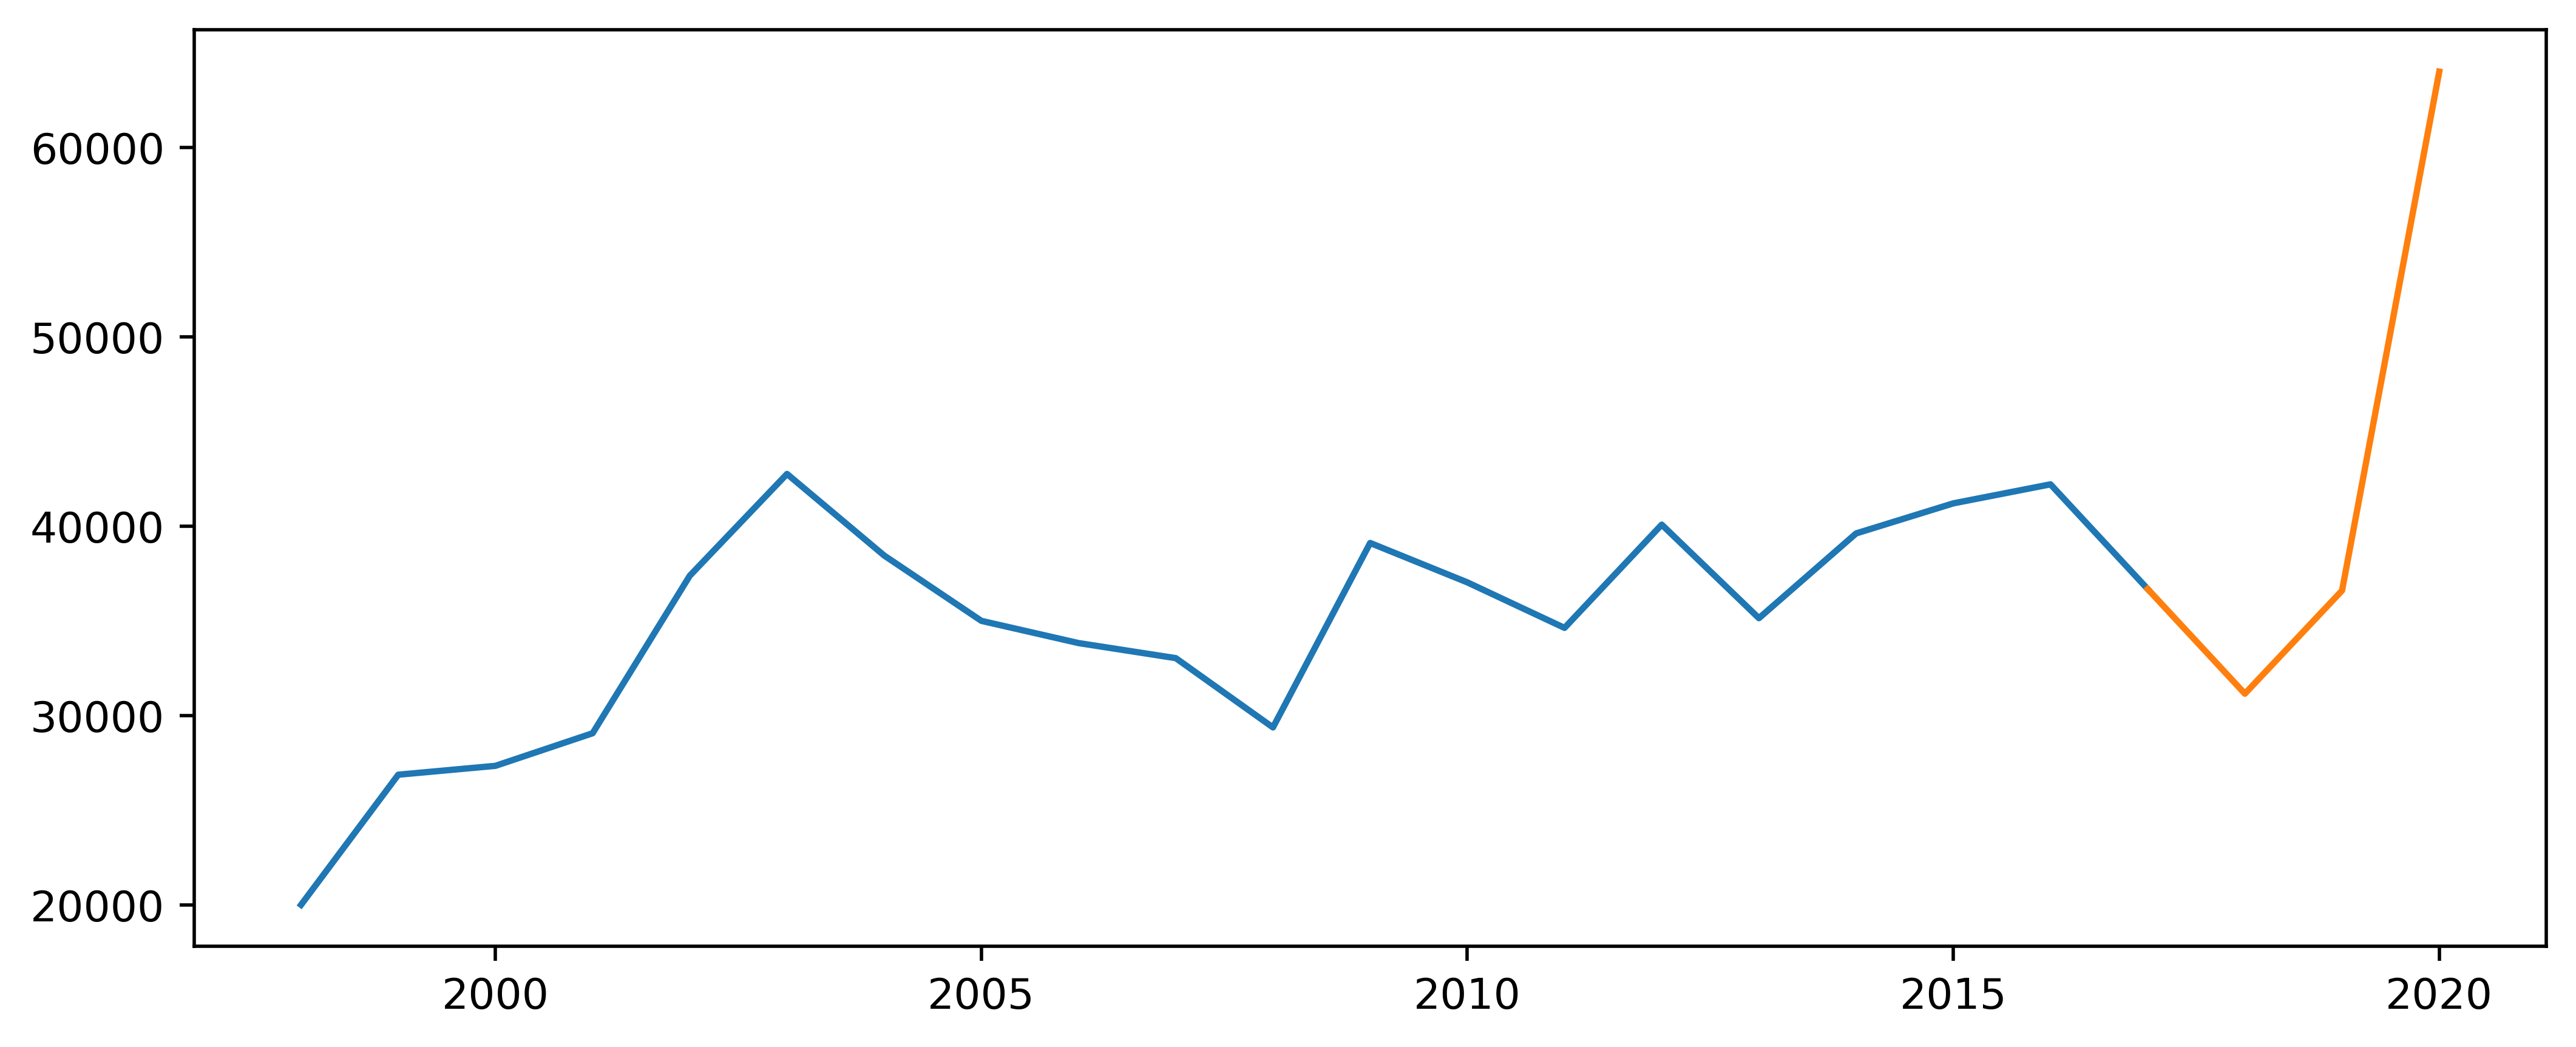

In [9]:
import scipy as cp
from scipy import interpolate 

e = cp.interpolate.interp1d(a, b, kind='next', fill_value = "extrapolate")
e = cp.interpolate.CubicSpline(a, b, axis=0,bc_type='natural' ,extrapolate=bool)
a2 = []
b2 = []
for i in range(4):
    a2.append(2017 + i)
    b2.append(e(2017 + i))
print(b2)
     
    
plt.plot(a, b)
plt.plot(a2, b2)

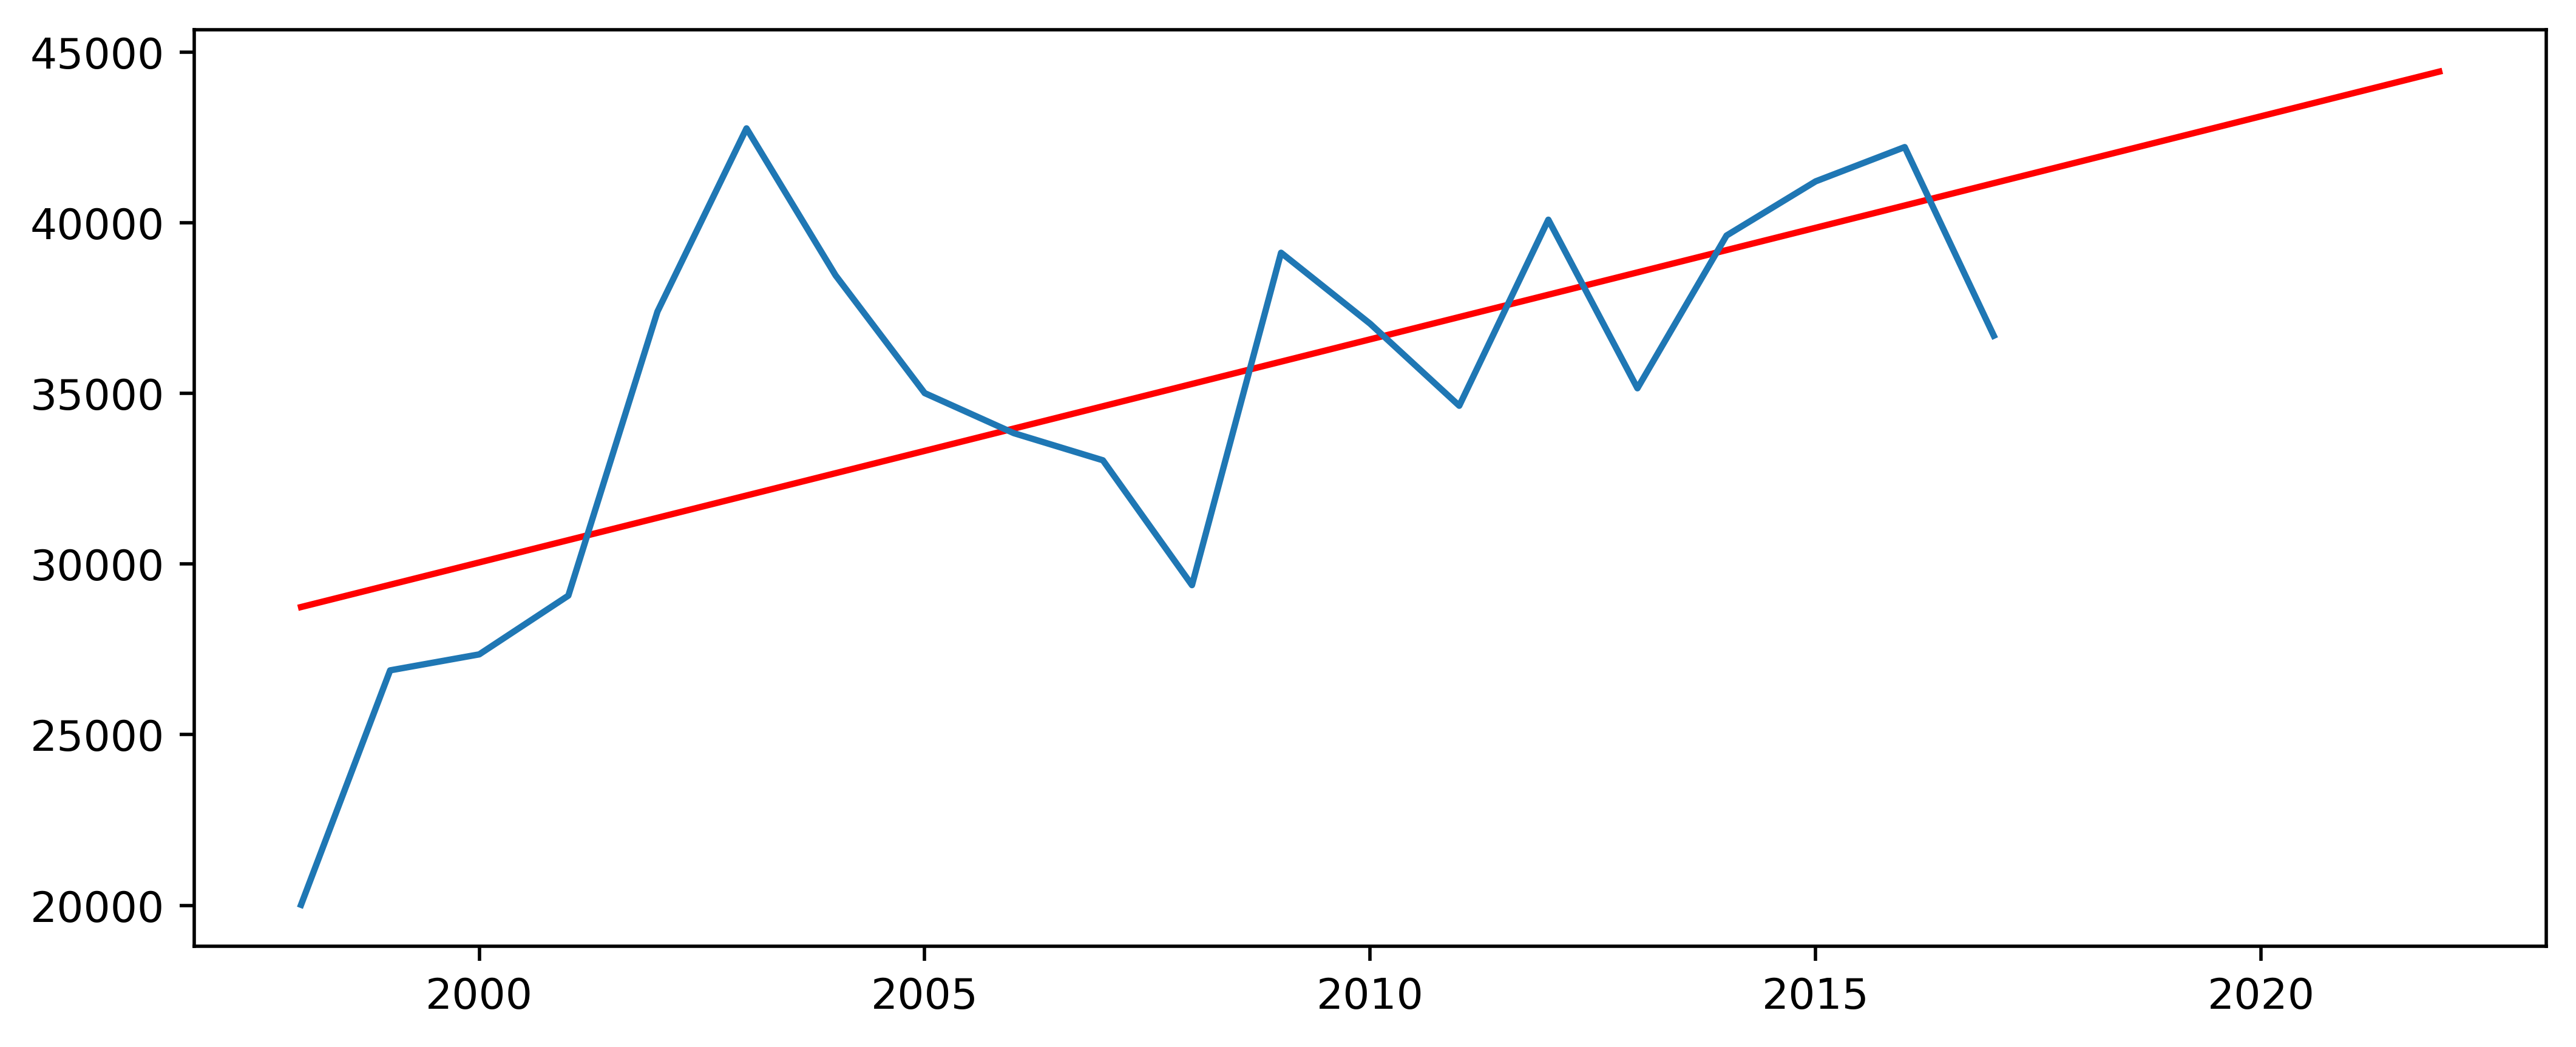

In [10]:
# Least squares polynomial fit
x = np.linspace(1998, 2022, 100)
p = np.poly1d(np.polyfit(a, b, 1))

plt.plot(x, p(x), 'r')
plt.plot(a, b)


## Vývoj počtu požárů v červenci

In [11]:
# Vytvoření df pouze pro měsíc červenec
fires = fires.set_index('měsíc')
cervenec= fires.loc['Červenec']


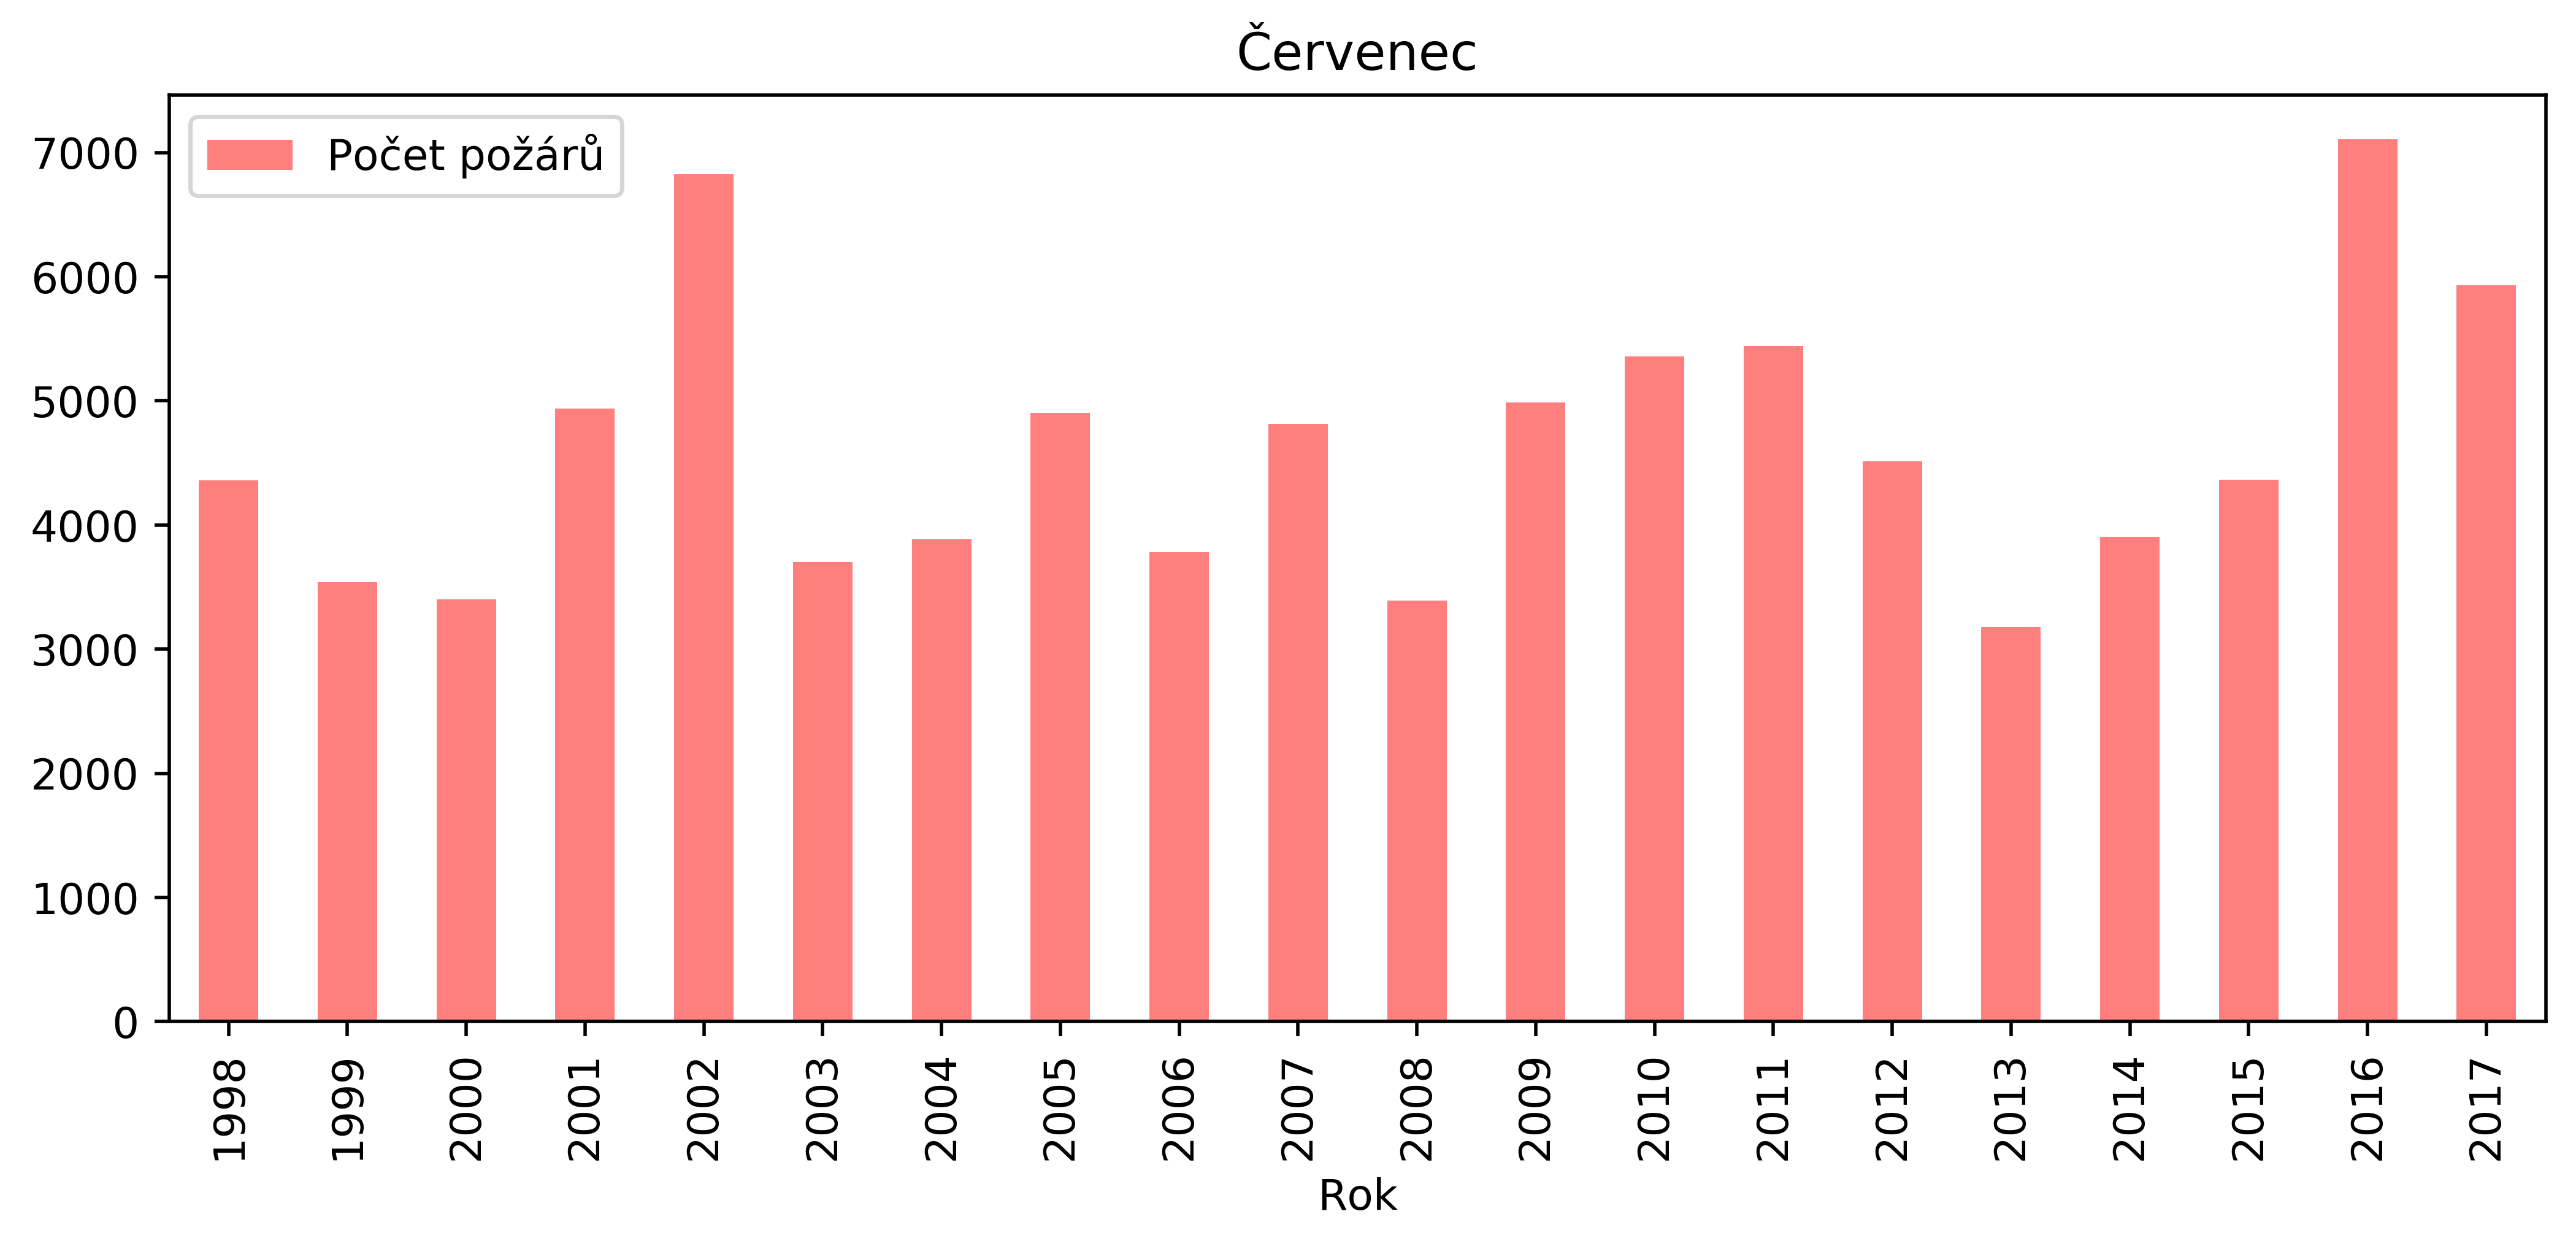

In [12]:
pozary_cervenec=[]
roky = list(fires.rok.unique())

for i in roky:
    y4=cervenec.loc[cervenec['rok']==i].počet.sum().round(0)
    pozary_cervenec.append(y4)  
    
# Vytvoření df s výsledky  
pozary_cervenec={'Rok':roky,'Počet požárů':pozary_cervenec}
# Vytvoření nového sub df pro graf
pozary_cervenec_plot_df = pd.DataFrame(pozary_cervenec)
#print(pozary_cervenec_plot_df)

#Graf
plt.rcParams["figure.figsize"] = [10, 4]
#plt.rcParams["figure.dpi"] = 500
pozary_cervenec_plot_df.plot.bar(x='Rok', y='Počet požárů', rot=90, alpha=0.5,  color='r')
plt.title('Červenec')
plt.show()

## Korelace mezi státy s nejvíce požáry

In [13]:
# Vytvoření prázdných listů pro 5 států s nejvíce požáry
mato_list=[] 
paraiba_list=[] 
sao_list=[]
rio_list=[]
bahia_list=[] 

In [14]:
# Počet požáru v jednotlivých státech podle let
for x in staty:
    st=x
    for i in roky:
        ye=i
        if st=='Bahia':
            y=fires.loc[(fires['stát']== st) & (fires['rok']== ye)].počet.sum().round(0)
            bahia_list.append(y)
        elif st=='Mato Grosso':
            y=fires.loc[(fires['stát']== st) & (fires['rok']== ye)].počet.sum().round(0)
            mato_list.append(y)
        elif st=='Paraiba':
            y=fires.loc[(fires['stát']== st) & (fires['rok']== ye)].počet.sum().round(0)
            paraiba_list.append(y)
        elif st=='Rio':
            y=fires.loc[(fires['stát']== st) & (fires['rok']== ye)].počet.sum().round(0)
            rio_list.append(y)
        elif st=='Sao Paulo':
            y=fires.loc[(fires['stát']== st) & (fires['rok']== ye)].počet.sum().round(0)
            sao_list.append(y)
        

In [15]:
# Vytvoření df s početem požárů v pěti státech s nejvíce požáry
stat_corr_df=pd.DataFrame(list(zip(roky, bahia_list, mato_list, paraiba_list,  rio_list, sao_list)),
                            columns =['Rok', 'Mato Grosso', 'Paraiba', 'Sao Paulo', 'Rio', 'Bahia'])
#Zobrazení prvních 5ti řádků df
stat_corr_df.head(5)

,Rok,Mato Grosso,Paraiba,Sao Paulo,Rio,Bahia
0,1998,1225.0,2401.0,816.0,1149.0,3196.0
1,1999,1198.0,2979.0,3437.0,1030.0,4249.0
2,2000,1379.0,3897.0,2804.0,650.0,4128.0
3,2001,2428.0,3088.0,2073.0,857.0,2926.0
4,2002,2281.0,3666.0,2249.0,2945.0,3539.0


In [16]:
mato=stat_corr_df['Mato Grosso']
para=stat_corr_df['Paraiba']
sao=stat_corr_df['Sao Paulo']
rio=stat_corr_df['Rio']
bahia=stat_corr_df['Bahia']

Mato Grosso - Mato Grosso | R: 1.0


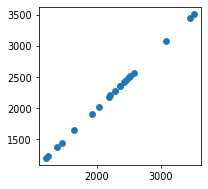

Paraiba - Mato Grosso | R: 0.33


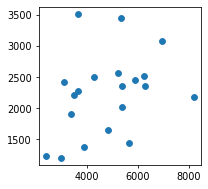

Sao Paulo - Mato Grosso | R: 0.01


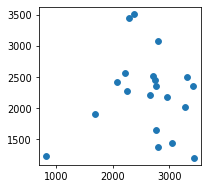

Rio - Mato Grosso | R: 0.33


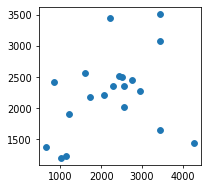

Bahia - Mato Grosso | R: -0.22


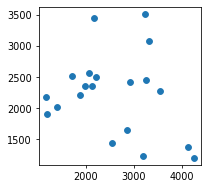

Mato Grosso - Paraiba | R: 0.33


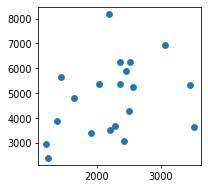

Paraiba - Paraiba | R: 1.0


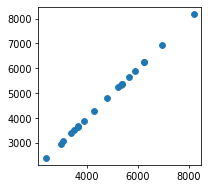

Sao Paulo - Paraiba | R: 0.45


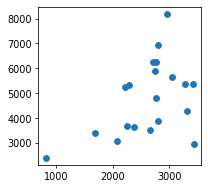

Rio - Paraiba | R: 0.42


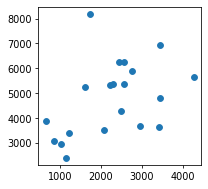

Bahia - Paraiba | R: -0.44


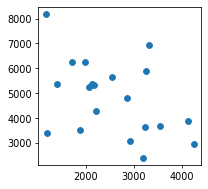

Mato Grosso - Sao Paulo | R: 0.01


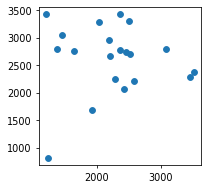

Paraiba - Sao Paulo | R: 0.45


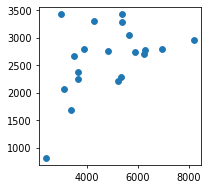

Sao Paulo - Sao Paulo | R: 1.0


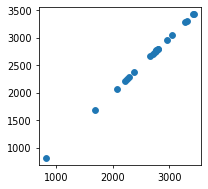

Rio - Sao Paulo | R: 0.32


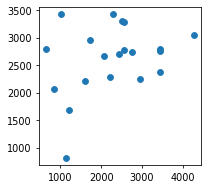

Bahia - Sao Paulo | R: -0.03


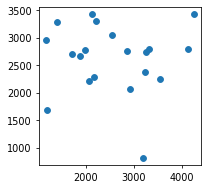

Mato Grosso - Rio | R: 0.33


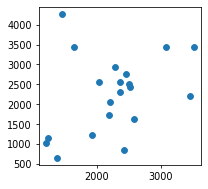

Paraiba - Rio | R: 0.42


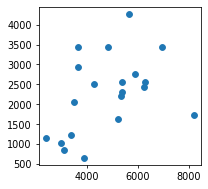

Sao Paulo - Rio | R: 0.32


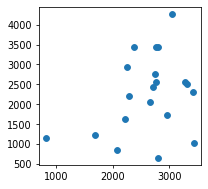

Rio - Rio | R: 1.0


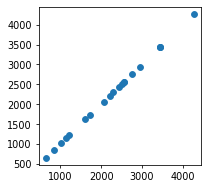

Bahia - Rio | R: -0.06


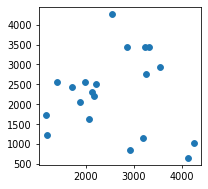

Mato Grosso - Bahia | R: -0.22


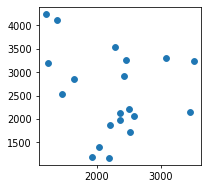

Paraiba - Bahia | R: -0.44


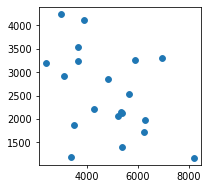

Sao Paulo - Bahia | R: -0.03


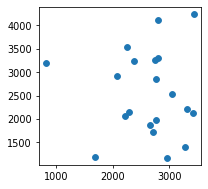

Rio - Bahia | R: -0.06


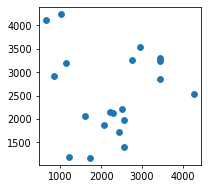

Bahia - Bahia | R: 1.0


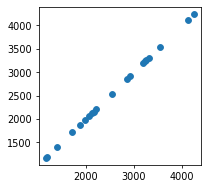

In [17]:
# Vyhození sloupce 'Rok'

stat_corr_df = stat_corr_df.drop('Rok', 1)
#print(stat_corr_df)

# Pearsonův korelační koeficient
R = []
for i in stat_corr_df:
    for j in stat_corr_df:
        x = stat_corr_df[j]
        y = stat_corr_df[i]
        R = np.corrcoef(x, y).round(2)
        print(j,'-', i, '|', 'R:', R[1, 0])
        #plt.figure(figsize=(3,3))
        #plt.plot(x, y, 'o')
        #plt.show()
        fig, axes = plt.subplots(figsize=(3,3), dpi=70)
        axes.plot(x, y, 'o')
        plt.show()
    
